# Peak-specific profiles
New to pynams? Check out the [intro and basic examples](https://github.com/EFerriss/Pynams/blob/master/EXAMPLES.ipynb).


## Use multiple baselines for well-separated peaks
You can just make and save different baselines, one under each peak or set of peaks that you are interested in, and do profile.get_baselines() before each plotting step, as described in [these baseline examples](https://github.com/EFerriss/Pynams/blob/master/EXAMPLES.ipynb).


## Peak fitting programs
* [peakfit.m](https://terpconnect.umd.edu/~toh/spectrum/InteractivePeakFitter.htm#command): free, for MATLAB
* [OpticalFit](http://www.csiro.au/luminescence/opticalfit/): free, for Windows
* [Peakfit](http://www.sigmaplot.co.uk/products/peakfit/peakfit.php): not free, [Ingrin et al. 2013](http://link.springer.com/article/10.1007/s00269-013-0587-3) used it

My personal experience with peakfit.m was that it often gave weird and clearly incorrect results and I ended up hand-fitting all the spectra individually for [my cpx paper](http://link.springer.com/article/10.1007/s00410-016-1262-8) anyway. With pynams I've tried to make that process slightly less painful.


## Some setup

In [29]:
%matplotlib inline
%config InlineBackend.figure_formats=["svg"]
from __future__ import print_function, division
import matplotlib.pyplot as plt
import pynams
from pynams import Spectrum, Profile
FTIR_file_location = pynams.example_FTIR_file_location

spectrum = Spectrum(fname='augite1', folder=FTIR_file_location, thickness_microns=268.)

profile = Profile(fnames=['olivine1', 'olivine2', 'olivine3', 'olivine4'],  
                  folder=FTIR_file_location, 
                  thicknesses_microns=300., 
                  positions_microns=[10., 20., 30., 40.])

## Locate peaks

Making default linear baseline
Use Spectrum.make_baseline for other baseline options
peak wavenumber locations
[ 3245.663  3459.726  3546.509  3629.434]


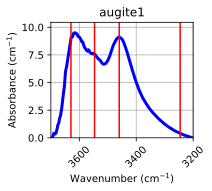

In [30]:
my_peak_locations = spectrum.find_peaks()
print('peak wavenumber locations')
print(my_peak_locations)

## Make some Gaussians
The default uses the positions found by find_peaks.

peak positions: [ 3245.663  3459.726  3546.509  3629.434]
heights: [ 0.40946383  9.10428928  7.57640413  8.98473876]


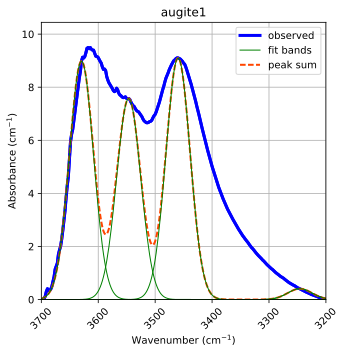

In [31]:
fig, ax = spectrum.make_peakfit()

## Make whatever Gaussians you want

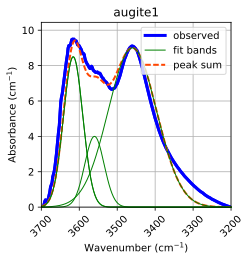

In [32]:
fig, ax = spectrum.make_peakfit(peak_positions=[3616, 3560, 3460],
                                peak_heights=[8.5, 4, 9],
                                peak_widths=[60, 60, 150])
fig.set_size_inches(4, 4)

## Save your peaks
Keywords are similar to save_baseline, except baseline_ending is peak_ending.

In [33]:
spectrum.save_peakfit(folder=FTIR_file_location)

Saved pynams\example_FTIR_spectra\augite1-peakfit.CSV


## Peak fitting in profiles
A lot of good stuff that is working, but it's late, and I'm tired, so examples will have to wait.